In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

/data/mutakabbir/Lightning/venv/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
fire_file = "/data/mutakabbir/Lightning/data/fire/NFDB_poly/NFDB_poly_20210707.shp"
save_file_location = "/data/mutakabbir/Lightning/data/fire/2018.shp"

# Explore fires from all years

In [3]:
fire = gpd.read_file(fire_file)

In [4]:
fire = fire.to_crs("EPSG:4326")

In [5]:
fire.head()

,SRC_AGENCY,FIRE_ID,FIRENAME,YEAR,MONTH,DAY,REP_DATE,DATE_TYPE,OUT_DATE,DECADE,...,UNBURN_REM,MORE_INFO,POLY_DATE,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,AG_SRCFILE,ACQ_DATE,SRC_AGY2,geometry
0,BC,2004-C10175,None,2004,6,23,2004-06-23,Report date,None,2000-2009,...,None,None,2007-05-17,BC-2004-C10175,None,None,H_FIRE_PLY,2011-06-10,BC,"POLYGON ((-124.61060 53.08084, -124.60990 53.0..."
1,BC,2004-C10176,None,2004,6,23,2004-06-23,Report date,None,2000-2009,...,None,None,2007-05-17,BC-2004-C10176,None,None,H_FIRE_PLY,2011-06-10,BC,"POLYGON ((-124.48262 53.06162, -124.48150 53.0..."
2,BC,2004-C50114,None,2004,6,20,2004-06-20,Report date,None,2000-2009,...,None,None,2007-05-17,BC-2004-C50114,None,None,H_FIRE_PLY,2011-06-10,BC,"POLYGON ((-125.12760 52.13023, -125.12726 52.1..."
3,BC,2004-C50125,None,2004,6,21,2004-06-21,Report date,None,2000-2009,...,None,None,2007-05-17,BC-2004-C50125,None,None,H_FIRE_PLY,2011-06-10,BC,"POLYGON ((-125.75419 52.27968, -125.75294 52.2..."
4,BC,2004-C50149,None,2004,6,22,2004-06-22,Report date,None,2000-2009,...,None,None,2007-05-17,BC-2004-C50149,None,None,H_FIRE_PLY,2011-06-10,BC,"POLYGON ((-126.26477 52.99880, -126.26379 52.9..."


In [35]:
fire.shape

(59539, 27)

In [38]:
fire.columns.values

array(['SRC_AGENCY', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY',
       'REP_DATE', 'DATE_TYPE', 'OUT_DATE', 'DECADE', 'SIZE_HA',
       'CALC_HA', 'CAUSE', 'MAP_SOURCE', 'SOURCE_KEY', 'MAP_METHOD',
       'WATER_REM', 'UNBURN_REM', 'MORE_INFO', 'POLY_DATE', 'CFS_REF_ID',
       'CFS_NOTE1', 'CFS_NOTE2', 'AG_SRCFILE', 'ACQ_DATE', 'SRC_AGY2',
       'geometry'], dtype=object)

# Exploring cause of fire

<AxesSubplot:>

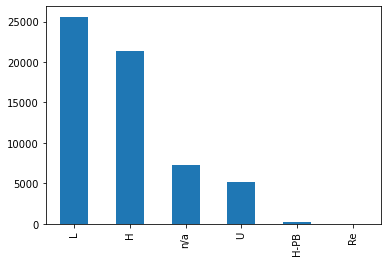

In [49]:
fire['CAUSE'].value_counts().plot(kind="bar")

# Exploring Month of fire

<AxesSubplot:>

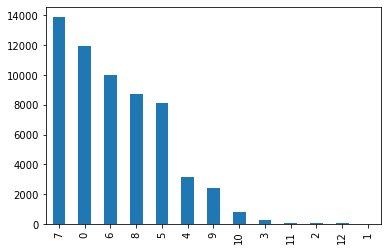

In [55]:
fire['MONTH'].value_counts().plot(kind="bar")

# Extract canada geometry

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [24]:
canada = world[world.name == 'Canada']
del world

# Plots

## Canada Fire Data By Cause

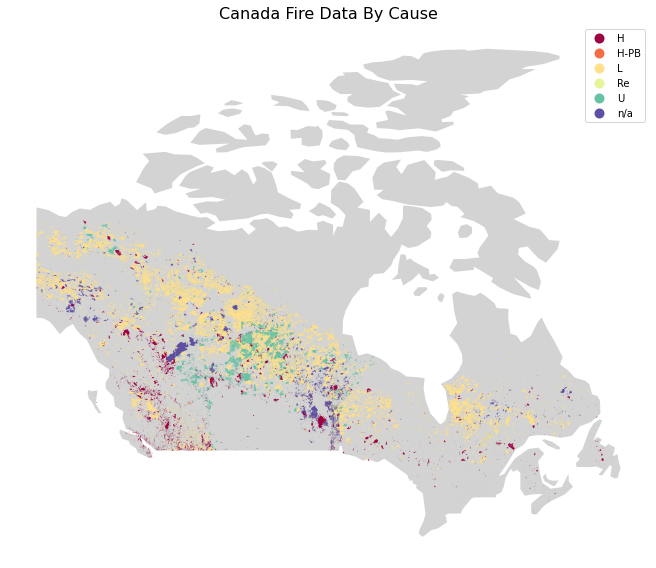

In [56]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire.plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='CAUSE', 
    legend=True,
#     legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':12,'frameon':False},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canada Fire Data By Cause',fontsize=16)

plt.tight_layout()

## Canada Fire Data By Month

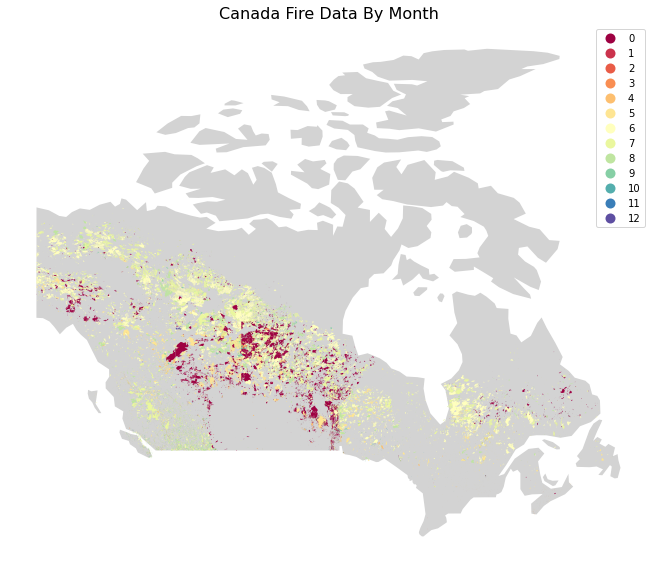

In [57]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire.plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='MONTH', 
    legend=True,
#     legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':12,'frameon':False},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canada Fire Data By Month',fontsize=16)

plt.tight_layout()

## Canada Fire Data By Year

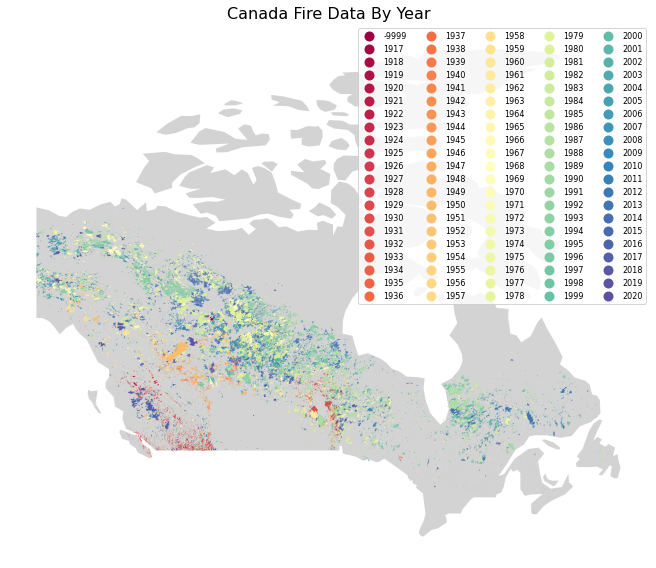

In [67]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire.plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='YEAR', 
    legend=True,
    legend_kwds={'fontsize':8,'frameon':True, 'ncol':5},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canada Fire Data By Year',fontsize=16)

plt.tight_layout()

# Explore 2018 Fires

In [4]:
fire_2018 = fire[fire["YEAR"] == 2018]
# del fire

In [5]:
fire_2018 = fire_2018.to_crs("EPSG:4326")

In [31]:
fire_2018.head()

,SRC_AGENCY,FIRE_ID,FIRENAME,YEAR,MONTH,DAY,REP_DATE,DATE_TYPE,OUT_DATE,DECADE,...,UNBURN_REM,MORE_INFO,POLY_DATE,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,AG_SRCFILE,ACQ_DATE,SRC_AGY2,geometry
20301,BC,2018-N52722,None,2018,8,11,2018-08-11,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-N52722,None,None,None,2019-05-01,BC,"POLYGON Z ((-118.00957 50.09268 0.00000, -118...."
20302,BC,2018-C31701,None,2018,7,30,2018-07-30,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-C31701,None,None,None,2019-05-01,BC,"POLYGON Z ((-120.47005 52.89034 0.00000, -120...."
20303,BC,2018-G90358,None,2018,5,23,2018-05-23,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-G90358,None,None,None,2019-05-01,BC,"POLYGON Z ((-123.72140 58.46164 0.00000, -123...."
20304,BC,2018-N52073,None,2018,8,2,2018-08-02,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-N52073,None,None,None,2019-05-01,BC,"POLYGON Z ((-117.57547 50.09645 0.00000, -117...."
20305,BC,2018-K42099,None,2018,7,31,2018-07-31,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-K42099,None,None,None,2019-05-01,BC,"POLYGON Z ((-118.62263 50.73653 0.00000, -118...."


In [34]:
fire_2018.shape

(1833, 27)

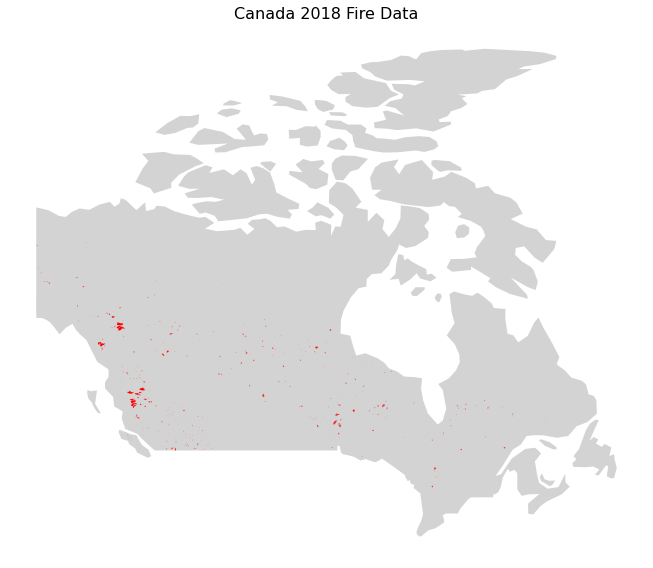

In [30]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire_2018.plot(
    ax=ax,  
    markersize=.1,
    color="red"
)

ax.axis('off')
ax.set_title('Canada 2018 Fire Data',fontsize=16)

plt.tight_layout()

In [14]:
fire_2018.to_file(save_file_location, mode='w')